In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.duplicated().sum()

403

In [4]:
df1 = df.copy()
df1 = df1.drop_duplicates(keep='first')

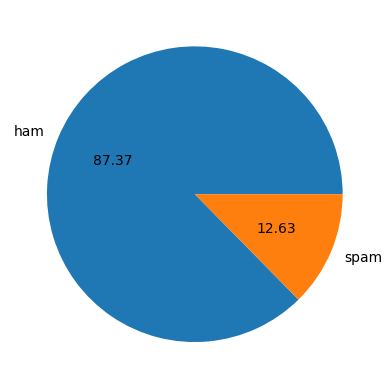

In [5]:
import matplotlib.pyplot as plt

plt.pie(df1['v1'].value_counts(), labels=['ham', 'spam'], autopct= '%.2f')
plt.show()

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
df1['v1'].replace({"ham" : 1, "spam" : 0}, inplace=True)
y = df1['v1']
text_feat1 = df1['v2']

In [9]:
import re, string

def remove_hyperlink(word):
    return re.sub(r"http\S+", "", word)

def to_lower(word):
    result = word.lower()
    return result

def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

def remove_punctuation(word): #bỏ dấu câu
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result


def remove_whitespace(word):
    result = word.strip()
    return result

def replace_newline(word):
    return word.replace('\n','')


def remove_extra_whitespace(word):
    return ' '.join(word.split())

def remove_stopwords(word):
    stop_words = set(stopwords.words('english'))
    filtered_word = [w for w in word.split() if not w in stop_words]
    return " ".join(filtered_word)




def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,remove_whitespace,
                      remove_extra_whitespace,
                      remove_emoji]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

X = [clean_up_pipeline(o) for o in text_feat1]

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Sử dụng TfidfVectorizer trên tất cả dữ liệu đầu vào
vectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
X = vectorizer.fit_transform(X)

# Chia tập huấn luyện và tập kiểm tra từ tập dữ liệu gộp
size = round(len(y) * 0.2)

X_train = X[:size]
X_test = X[size:]

y_train = y[:size]
y_test = y[size:]

In [11]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1')

In [12]:
lrc.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [13]:
lrc.score(X_test,y_test)

0.920677146311971

In [16]:
# Dự đoán nhãn email ham
new_sentence = "I hate this movie and don't want to see again"
new_feature = vectorizer.transform([new_sentence]) # Biến đổi câu thành feature
predicted_label = lrc.predict(new_feature) # Dự đoán nhãn của câu
print("Predicted label for the new sentence:", predicted_label)

Predicted label for the new sentence: [1]


In [17]:
# Dự đoán nhãn email spam
new_sentence = "07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow"
new_feature = vectorizer.transform([new_sentence]) # Biến đổi câu thành feature
predicted_label = lrc.predict(new_feature) # Dự đoán nhãn của câu
print("Predicted label for the new sentence:", predicted_label)

Predicted label for the new sentence: [0]
